<a href="https://colab.research.google.com/github/adenikeadewumi/EEE_254/blob/main/Ass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bisecton method of getting the cube root of a number

In [102]:
#Importations
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
#Take cube number form user
cube_num= int(input("Enter the cube number: "))


def cube_root(cube_num):
  start_time= time.time()
  # Find the number of digits in the cube number
  no_of_digits= len(str(cube_num))
  # Initialize counter and low to zero
  counter, low= 0, 0
  #abs_cube= abs(cube_num)
  high= cube_num
  is_negative= cube_num < 0
  #Set guess to the avg of high and low
  guess= (high+low)/2
  # define an epsion close to zero to check how close the guess**3 is to the actual cube number
  epsilon= 0.001
  # Use while loop to iterate through steps until guess**3 converges to cube_num
  while abs(guess**3 -cube_num) >= epsilon:
    #Use if-else to set a condition to check how to update high and low.
    # The nested if else is to take care of cases where our guess will be negative because cube_num is negative. Therefore the high is set to guess when guess**3 < cube number and low if it is > than the cube number
    if guess**3 < cube_num:
      if is_negative:
        high= guess
      else:
        low = guess
    else:
      if is_negative:
        low= guess
      else:
        high= guess
    # Calculate new guess
    guess= (high+low)/2
    #Increment counter
    counter+= 1
  #Get time taken
  end_time= time.time()
  total_time= end_time- start_time
  return guess, counter, no_of_digits, total_time

ans, steps, num_digit, total_time= cube_root(cube_num)
print(f"The cube root of {cube_num} is {ans}")
print(f"Number of steps taken: {steps}")
print(f"Total time taken: {total_time}")



Enter the cube number: 837
The cube root of 837 is 9.424142204225063
Number of steps taken: 26
Total time taken: 2.3126602172851562e-05


Execute the program in C

In [127]:
%%writefile cube_root.c
#include <stdio.h>
#include <math.h>
#include <stdlib.h>
#include <time.h>

#define MAX_TEST_CASES 4

// Structure to store result of cube root calculation
typedef struct {
    double guess;
    int steps;
    int num_digits;
    double time_taken;
} Result;

// Function to calculate cube root using bisection
Result cube_root(int cube_num, double epsilon) {
    clock_t start, end;
    Result res;
    int counter = 0;
    double low = 0;
    double high = cube_num;
    int is_negative = cube_num < 0;

    if (is_negative) high = -cube_num;

    double guess = (high + low) / 2.0;

    start = clock();

    while (fabs(pow(guess, 3) - cube_num) >= epsilon) {
        if (pow(guess, 3) < cube_num) {
            if (is_negative) {
                high = guess;
            } else {
                low = guess;
            }
        } else {
            if (is_negative) {
                low = guess;
            } else {
                high = guess;
            }
        }
        guess = (high + low) / 2.0;
        counter++;
    }

    end = clock();

    res.guess = guess;
    res.steps = counter;
    res.num_digits = (int)log10(fabs(cube_num)) + 1;
    res.time_taken = (double)(end - start) / CLOCKS_PER_SEC;

    return res;
}

int main() {
    int inputs[MAX_TEST_CASES] = {10, 1000, 100000, 10000000};

    Result results[MAX_TEST_CASES];
    double epsilon = 0.001;

    // Open CSV file for writing
    FILE *fp = fopen("results.csv", "w");
    if (fp == NULL) {
        printf("Could not open file to write results.\n");
        return 1;
    }

    // Write CSV headers
    fprintf(fp, "Input,Digits,Steps,Time,Guess\n");

    for (int i = 0; i < MAX_TEST_CASES; i++) {
        results[i] = cube_root(inputs[i], epsilon);
        printf("Cube root of %d is approximately %.5f\n", inputs[i], results[i].guess);
        printf("Steps: %d | Digits: %d | Time: %f seconds\n\n", results[i].steps, results[i].num_digits, results[i].time_taken);

        // Write each result to CSV
        fprintf(fp, "%d,%d,%d,%f,%.5f\n", inputs[i], results[i].num_digits, results[i].steps, results[i].time_taken, results[i].guess);
    }

    fclose(fp);
    return 0;
}


Overwriting cube_root.c


In [128]:
# Step 2: Compile the C code
!gcc cube_root.c -o cube_root -lm


In [129]:
# Step 3: Run the compiled code
!./cube_root


Cube root of 10 is approximately 2.15439
Steps: 15 | Digits: 2 | Time: 0.000015 seconds

Cube root of 1000 is approximately 10.00000
Steps: 26 | Digits: 4 | Time: 0.000004 seconds

Cube root of 100000 is approximately 46.41589
Steps: 36 | Digits: 6 | Time: 0.000005 seconds

Cube root of 10000000 is approximately 215.44347
Steps: 46 | Digits: 8 | Time: 0.000005 seconds



Plot of program's performance

In [130]:
#Define a function to get the number of points to be plotted to evaluate our program's performance
def get_points_graph(num_of_points):
  x= []
  y= []
  lst_total_time= []
  lstcube_num=[10, 1000, 100000, 10000000]
  for i in range(num_of_points):
    cube_num= lstcube_num[i]
    guess, counter, no_of_digits, total_time= cube_root(cube_num)
    x.append(no_of_digits)
    y.append(counter)
    lst_total_time.append(total_time)
  return x, y, lst_total_time




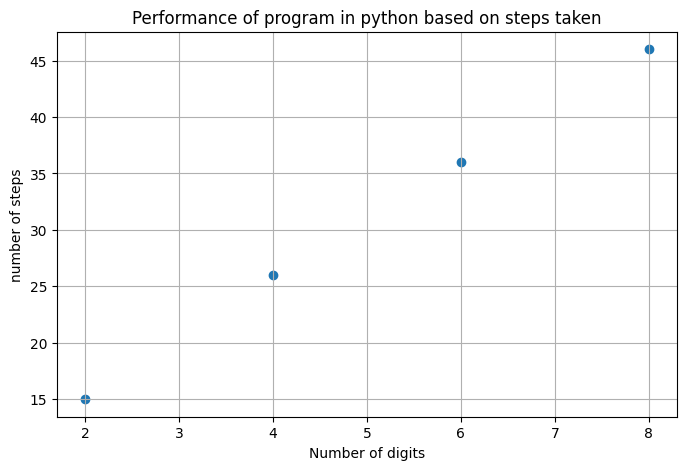

In [113]:
#Get the points
x,y, total_time = get_points_graph(4)
# Create a new figure
fig = plt.figure(figsize=(8,5))
#Convert points to arrays
x = np.array(x)
y = np.array(y)
#Label the grapgh
plt.xlabel("Number of digits")
plt.ylabel("number of steps")
plt.title("Performance of program in python based on steps taken")
# Now we plot the graph
plt.scatter(x, y)
plt.grid(True)
#This must be added so the plot will show
plt.show()

Grapgh Time taken for C

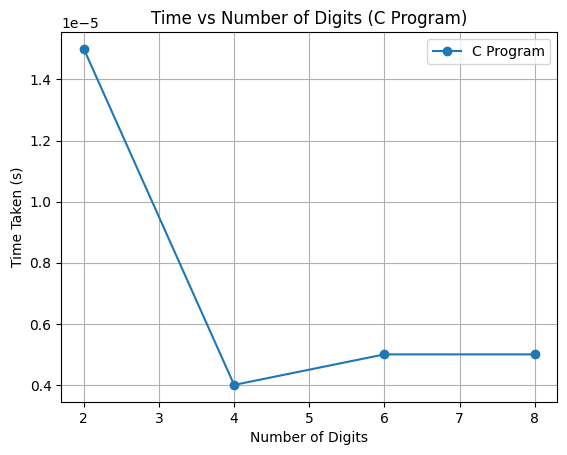

In [131]:


# Load the result gotten for the C program stored in csv file results
df = pd.read_csv('results.csv')

# Plot time vs number of digits
plt.plot(df['Digits'], df['Time'], marker='o', label='C Program')
plt.xlabel('Number of Digits')
plt.ylabel('Time Taken (s)')
plt.title('Time vs Number of Digits (C Program)')
plt.legend()
plt.grid(True)
plt.show()


Graph of time taken

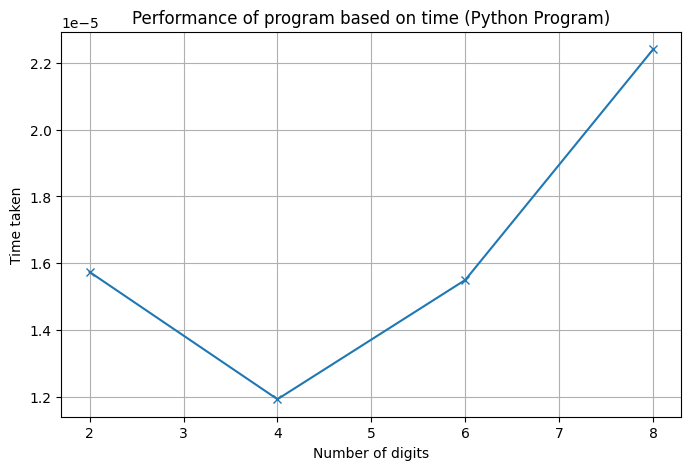

In [132]:
# Create a new figure
fig = plt.figure(figsize=(8,5))
#The x remains the same but now our y axis is the time taken
x = np.array(x)
total_time= np.array(total_time)
plt.xlabel("Number of digits")
plt.ylabel("Time taken")
plt.title("Performance of program based on time (Python Program)")
plt.plot(x, total_time, marker='x')
plt.grid(True)
plt.show()

Graph both C and Python time

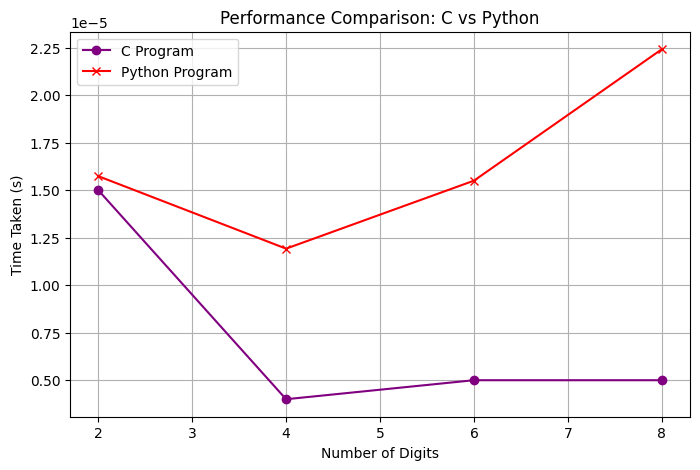

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the C program results
df = pd.read_csv('results.csv')

# Convert to numpy arrays for safety (optional)
x = np.array(x)
total_time = np.array(total_time)

# Create a figure
plt.figure(figsize=(8, 5))

# Plot C program results
# the Digits Column contains the No of digits which is our x- coordinates
# The Time column contains the time taken which are the y- coordinates
plt.plot(df['Digits'], df['Time'], marker='o', label='C Program', color='purple')

# Plot Python results
plt.plot(x, total_time, color='red', label='Python Program', marker='x')

# Labels and Title
plt.xlabel('Number of Digits')
plt.ylabel('Time Taken (s)')
plt.title('Performance Comparison: C vs Python')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Test for primality

In [ ]:
#Create a function to check whether a num is prime or not using bisection method
def check_ifprime(num):
  #This function uses the bisection method to check for prime numbers
  smallest_divisor= 0
  primality= None
  # This check whether 2 is a divisor therefore we can jump and
  if num % 2 == 0:
    smallest_divisor= 2
  else:
    #Create a loop through the range of 3 while incrementing by two(since we already took care of all even numbers) such that we have 3,5, 7....
    for i in range(3, num, 2):
      if num% i ==0:
        smallest_divisor= i
        break
      else:
        break
  # if there is a divisor then the number is not prime
  if smallest_divisor!= 0:
    primality= False
  else:
    primality= True
    return primality

# Define a function that gets the prime numbers in a range of values
def get_prime_number(start_num, end_num):
  #define an empty list to store prime numbers in
  lst_prime_num= []
  #Loop through the given range and append the prime numbers to the list
  for i in range(start_num, end_num):
    primality= check_ifprime(i)
    if primality:
      lst_prime_num.append(i)

  return lst_prime_num
# Get the input range and get the sum of prime numbers in the range
start_num, end_num= int(input("Enter start num: ")), int(input("Enter end num: "))
lst_prime_num= get_prime_number(start_num, end_num)
print(f"List of prime numbers in range {start_num} to {end_num} is {lst_prime_num}")
print(f"Sum of prime num in range is {sum(lst_prime_num)}")

Enter start num: 3
Enter end num: 1000
List of prime numbers in range 3 to 1000 is [3, 5, 7, 11, 13, 17, 19, 23, 25, 29, 31, 35, 37, 41, 43, 47, 49, 53, 55, 59, 61, 65, 67, 71, 73, 77, 79, 83, 85, 89, 91, 95, 97, 101, 103, 107, 109, 113, 115, 119, 121, 125, 127, 131, 133, 137, 139, 143, 145, 149, 151, 155, 157, 161, 163, 167, 169, 173, 175, 179, 181, 185, 187, 191, 193, 197, 199, 203, 205, 209, 211, 215, 217, 221, 223, 227, 229, 233, 235, 239, 241, 245, 247, 251, 253, 257, 259, 263, 265, 269, 271, 275, 277, 281, 283, 287, 289, 293, 295, 299, 301, 305, 307, 311, 313, 317, 319, 323, 325, 329, 331, 335, 337, 341, 343, 347, 349, 353, 355, 359, 361, 365, 367, 371, 373, 377, 379, 383, 385, 389, 391, 395, 397, 401, 403, 407, 409, 413, 415, 419, 421, 425, 427, 431, 433, 437, 439, 443, 445, 449, 451, 455, 457, 461, 463, 467, 469, 473, 475, 479, 481, 485, 487, 491, 493, 497, 499, 503, 505, 509, 511, 515, 517, 521, 523, 527, 529, 533, 535, 539, 541, 545, 547, 551, 553, 557, 559, 563, 565, 569, 57

Egg Problem

"Given the empire state building is 102 stories high. A man wanted to know the highest floor from which he could drop an egg wothout it breaking. He propsoed to drop an egg from the top floor, if it broke he would go down go down one step until he got to the point the egg doesnt break. Implement a method that uses 7 eggs max. (Explain how this use case can be used in some other scenarios and code it too)

In [93]:
# This is what we are looking for where the egg starts to break
threshold_floor=49
num_eggs= 7
highest_floor=102
guess= 0
drops= 0
low, high= 1, highest_floor #Set low to the lowest floor and high to the highest


while low <= high and num_eggs > 0:# This checks whether there are still rooms to search and if we still have eggs left
  drops+= 1 # Increment the number of drops
  guess= (low+high)/2 # apply  bisection method
  print(f"Dropping from {guess} floor....")
  if guess< threshold_floor: #If the guess floor is less than the threshold floor then the egg doesn't break and nothing is deducted from number of eggs
    print("Egg doesn't break")  # Print status of egg to keep track of what's happening
    low= guess+1 # Add 1 to the guess since we know the floor doesn't break the egg
  else: # If the guess floor is greater than or equal to the threshold floor then the egg beaks
    print("Egg breaks") # Print status of egg to keep track of what's happening
    high= guess-1 #Reduce the guess floor by 1 since we know the floor breaks the egg
    num_eggs-= 1 # One egg broke so it will be deducted


print(f"Threshold floor is approximately {low}")
print(f"Total drops: {drops}, Eggs left: {num_eggs}")



Dropping from 51.5 floor....
Egg breaks
Dropping from 25.75 floor....
Egg doesn't break
Dropping from 38.625 floor....
Egg doesn't break
Dropping from 45.0625 floor....
Egg doesn't break
Dropping from 48.28125 floor....
Egg doesn't break
Dropping from 49.890625 floor....
Egg breaks
Threshold floor is approximately 49.28125
Total drops: 6, Eggs left: 5
